In [1]:
import pandas as pd
import seaborn as sns

In [2]:
from sklearn import datasets
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import numpy as np

In [3]:
from sklearn.preprocessing import RobustScaler

In [4]:
# seaborn 한글 안깨지게
import seaborn as sns
import matplotlib.pyplot as plt

plt.rc("font", family = "Malgun Gothic")
sns.set(font="Malgun Gothic", 
rc={"axes.unicode_minus":False}, style='white')

In [5]:
elderly_life=pd.read_csv("노인생활인구_최종.csv",encoding="cp949")
elderly_build=pd.read_csv("노인시설수_최종.csv",encoding="cp949")
market=pd.read_csv("행정동별_유통업체_노인.csv",encoding="cp949")
hospital=pd.read_csv("의료기관수_노인.csv",encoding="cp949")

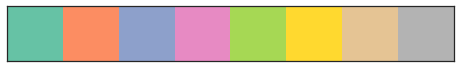

In [6]:
# seaborn palette -> 찾아보고 마음에 드는걸로 바꿔도 괜찮 !
palette = sns.color_palette('Set2') # palette 이름 () 안에 넣어주고
sns.palplot(palette) # 색상 확인
sns.set_palette('Set2') # 기본 palette로 적용됨

# 노인생활인구 의료기관 clustering

In [7]:
df4=pd.merge(elderly_life,hospital,on="행정동")
df4

,행정동,전체평균,의료기관수
0,가락1동,6173,6
1,가락2동,5619,37
2,가락본동,7463,86
3,가리봉동,2121,12
4,가산동,6771,65
...,...,...,...
417,효창동,2089,12
418,후암동,2825,15
419,휘경1동,3352,28
420,휘경2동,3962,8


In [8]:
# 의료기관 0인 행정동 제거 (df_acc)
df4 = df4.drop(index = df4[df4['의료기관수']==0].index)
df4=df4.reset_index(drop=True)
df4

,행정동,전체평균,의료기관수
0,가락1동,6173,6
1,가락2동,5619,37
2,가락본동,7463,86
3,가리봉동,2121,12
4,가산동,6771,65
...,...,...,...
417,효창동,2089,12
418,후암동,2825,15
419,휘경1동,3352,28
420,휘경2동,3962,8


In [9]:
# scaling
scaler = RobustScaler()
df4_scale=pd.DataFrame(scaler.fit_transform(df4[['전체평균','의료기관수']]),columns=df4[['전체평균','의료기관수']].columns)
df4_scale.insert(0, '행정동', df4['행정동'])
df4_scale

,행정동,전체평균,의료기관수
0,가락1동,0.576166,-0.840336
1,가락2동,0.367405,0.201681
2,가락본동,1.062270,1.848739
3,가리봉동,-0.950730,-0.638655
4,가산동,0.801507,1.142857
...,...,...,...
417,효창동,-0.962789,-0.638655
418,후암동,-0.685445,-0.537815
419,휘경1동,-0.486858,-0.100840
420,휘경2동,-0.256995,-0.773109


C:\Users\gtsye\anaconda3\envs\dongguk\lib\site-packages\sklearn\cluster\_kmeans.py:1037: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  "KMeans is known to have a memory leak on Windows "


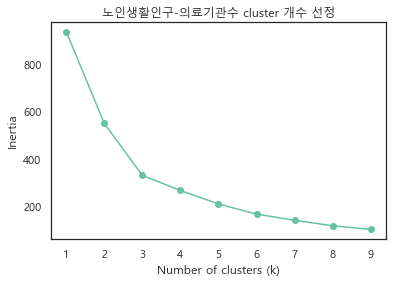

In [10]:
# elbow
data=df4_scale.values
X=data[:,1:]

num_clusters = list(range(1,10))
inertias = []

for i in num_clusters:
    model = KMeans(n_clusters=i)
    model.fit(X)
    inertias.append(model.inertia_)

plt.title('노인생활인구-의료기관수 cluster 개수 선정')
plt.plot(num_clusters, inertias, '-o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.show()

Text(0.5, 1.0, '노인 생활인구와 의료기관 clustering')

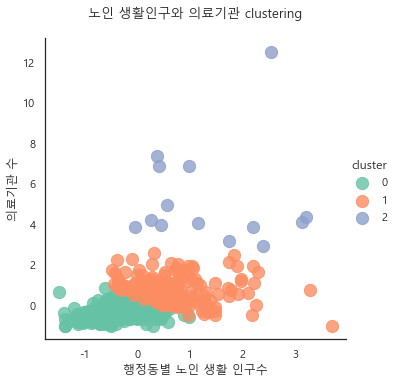

In [12]:
# clustering
kmeans = KMeans(n_clusters=3).fit(X)
kmeans.cluster_centers_
kmeans.labels_
df4_scale['cluster'] = kmeans.labels_

sns.lmplot(x='전체평균',y='의료기관수', data = df4_scale, fit_reg=False, scatter_kws={"s":150},hue="cluster")
plt.xlabel('행정동별 노인 생활 인구수')
plt.ylabel('의료기관 수')
plt.title('노인 생활인구와 의료기관 clustering', fontsize = 13, pad = 20) # pad : 제목과 그림 사이 간격

cluster 2 (상단) 선정

In [13]:
df4_final=df4_scale[df4_scale["cluster"]==2]
df4_final

,행정동,전체평균,의료기관수,cluster
58,논현1동,0.381347,7.361345,2
59,논현2동,0.445784,3.966387,2
108,명동,-0.034668,3.865546,2
175,상계6.7동,2.196891,3.865546,2
187,서교동,1.156854,4.067227,2
194,서초4동,0.422798,6.857143,2
275,여의동,3.119736,4.134454,2
276,역삼1동,2.526613,12.504202,2
283,영등포동,1.730758,3.193277,2
334,잠실본동,0.568629,4.941176,2


In [14]:
df4_final.to_csv("노인생활인구_의료기관수_clustering.csv",encoding="cp949")